# Maximum likelihood estimation (MLE)

In [84]:
# Importing libraries
import numpy as np
import scipy as sp
import pandas as pd
import lecroy
import os
from pathlib import Path
import sys
import json
from scipy.fft import rfft, irfft, rfftfreq
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# Global plot style settings
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "mathtext.fontset": "cm",            # Use Computer Modern for math
    "font.size": 14,                     # Base font size
    "axes.labelsize": 16,                # Axis label font size
    "axes.titlesize": 16,                # Title font size
    "legend.fontsize": 13,               # Legend font size
    "xtick.labelsize": 13,               # X tick label size
    "ytick.labelsize": 13,               # Y tick label size
    "axes.linewidth": 1.2,               # Thicker axis lines
    "xtick.direction": "in",             # x-yick direction
    "ytick.direction": "in",             # y-tick direction
    "text.usetex": False,                # Enable LaTeX if needed
    "figure.dpi": 150,                   # Good resolution for screens
    "savefig.dpi": 300                   # High resolution for saving
})

In [85]:
# Define function for nice plotting
def PlotSettings(ax, gridlines=False, minimalist=False):
    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    # Minimalist style
    if minimalist:
        # Hide top and right spines (borders)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # Ticks only on bottom and left
        ax.tick_params(which='both', top=False, right=False)
    else:
        # Tick parameters
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='major', length=7, width=1.2)
        ax.tick_params(which='minor', length=4, width=1)
    # Optional grid
    if gridlines:
        ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)
        ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.4)

In [113]:
# Loading data
parent = Path(os.path.dirname(os.getcwd()))
date = "091027"
state = "cat2"

data_path = parent / "data" / "dataframes" / date
data = pd.read_csv(data_path / (state + '.csv'))
# Remove first column
data = data.iloc[:, 1:]
data

,000,015,030,045,060,075,090,105,120,135,150,165
0,-1.247224,-0.405476,-0.787921,-1.031558,-1.150646,-0.635992,-0.090533,2.004901,0.574440,2.056802,-0.685708,-2.572257
1,-3.195867,1.347990,0.891425,1.333677,0.104485,0.815129,-0.682184,1.121323,0.895891,0.815599,-1.161983,1.283597
2,1.268553,0.730279,1.149287,-1.490197,-1.200450,-0.496884,0.428694,0.892980,1.027540,1.716334,2.879681,2.386166
3,-1.496110,1.469912,1.374268,-1.444326,-0.439568,0.394232,1.345192,1.054679,0.220496,2.540438,1.291087,-0.667538
4,-0.814007,-1.694596,0.274612,-1.648233,0.425861,-0.225853,-0.297177,0.898324,-1.193601,3.195115,0.823615,3.014923
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-1.904186,0.788026,0.546233,-0.648248,0.167852,0.343243,-1.932943,0.629069,0.730568,-0.487637,1.938917,-1.272972
29996,1.588338,-0.630833,0.518209,-0.252925,-1.300363,0.649354,0.300211,-0.725206,-1.108028,1.799625,3.369467,1.874249
29997,-1.900128,-0.050279,-0.245654,-1.137057,0.549167,-0.086879,-0.869307,1.312842,0.623615,-2.139512,1.321208,-2.955486
29998,0.918194,0.634387,0.093596,1.000597,-1.275189,0.961005,1.286688,1.534260,1.270234,1.221732,-1.704332,2.654083


In [114]:
# Get names of columns
column_names = data.columns.tolist()
column_names

['000',
 '015',
 '030',
 '045',
 '060',
 '075',
 '090',
 '105',
 '120',
 '135',
 '150',
 '165']

In [115]:
# Convert to numpy array
x_values = np.array(data)
x_values = np.swapaxes(x_values, 0, 1)

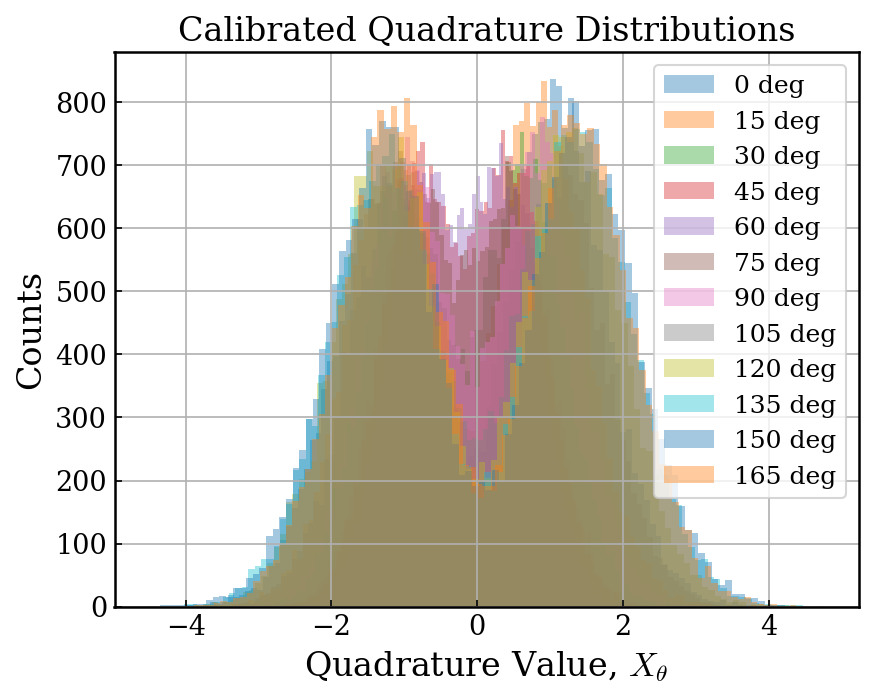

In [116]:
for i in range(12):
    plt.hist(x_values[i], bins=100, density=False, alpha=0.4, label=f"{15*i} deg")

plt.legend(fontsize=12)
plt.title("Calibrated Quadrature Distributions")
plt.xlabel("Quadrature Value, $X_\\theta$")
plt.ylabel("Counts")
plt.grid(True)
plt.show()

In [151]:
from iMLEv3 import iMLE
from WignerDensity import rho_to_Wigner, Wigner_to_rho

In [141]:
# Make array from 0 to 165 in steps of 15
thetas = np.arange(0, 166, 15)
# Convert to radians
thetas = np.radians(thetas)
theta0 = np.deg2rad(57)
x0 = -0.15

rho_est, likelihoods = iMLE(thetas-theta0, x_values-x0, N=15, num_bins=400, max_iters=400, tol=1e-3)


 43%|████▎     | 173/400 [00:08<00:10, 21.07it/s]

Converged at iteration 173, log-likelihood=-539446.598083


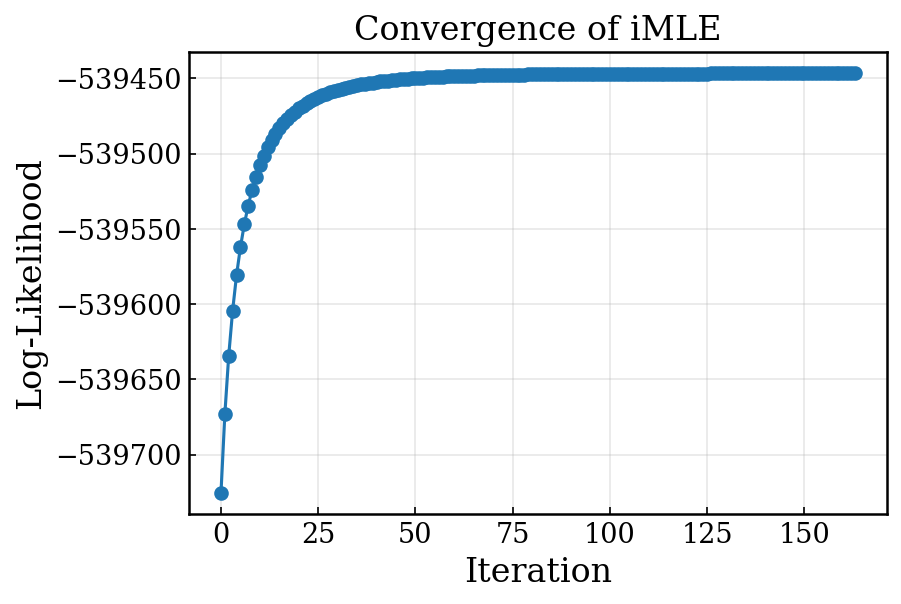

In [142]:
# Plot log-likelihood history
plt.figure(figsize=(6,4))
plt.plot(likelihoods[10:], marker="o", lw=1.5)
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("Convergence of iMLE")
plt.grid(True, alpha=0.3)
plt.show()

In [171]:
rho_est = np.load(parent/"rho_est.npy")

In [143]:
rho_est.shape

(15, 15)

In [144]:
N = rho_est.shape[0]

# Make array from 0 to N in steps of 1
n_values = np.arange(0, N, 1)

diagonals = np.array([])

for i in range(N):
    diagonals = np.append(diagonals, np.real(rho_est[i, i]))
diagonals

array([2.52571185e-01, 5.40650648e-01, 9.69093845e-02, 7.60889287e-02,
       2.00210105e-02, 9.69008808e-03, 2.49847094e-03, 1.00280032e-03,
       3.32902373e-04, 1.74024496e-04, 3.56059930e-05, 1.73189584e-05,
       3.82244987e-06, 2.79685310e-06, 1.01285056e-06])

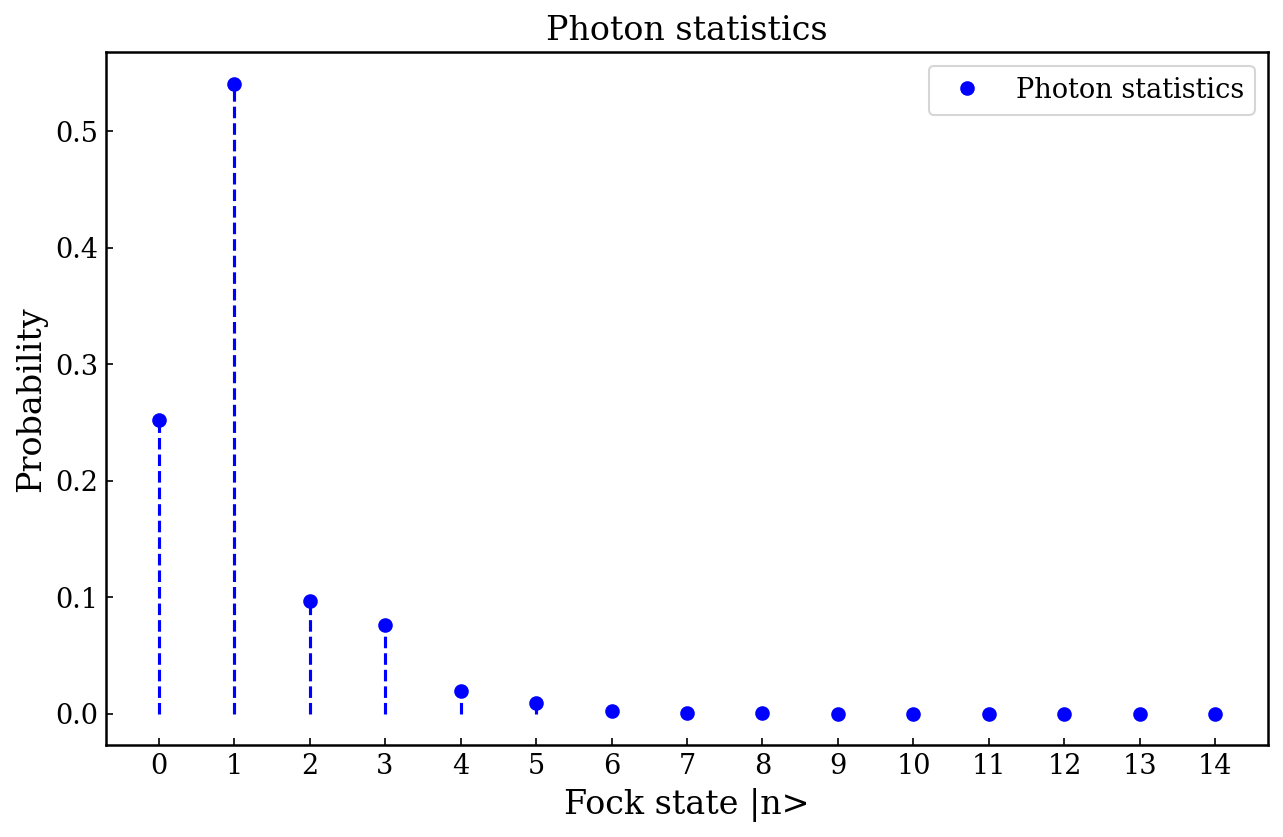

In [145]:
# Make plot of photon statistics
plt.figure(figsize=(10, 6))
for i in range(len(n_values)):
    plt.vlines(n_values[i], 0, diagonals[i], colors='blue', linestyles='dashed')

plt.plot(n_values, diagonals, 'o', color='blue', label='Photon statistics')
plt.xlabel('Fock state |n>')
plt.ylabel('Probability')
plt.title('Photon statistics')
plt.xticks(n_values)
plt.legend()
plt.show()

In [170]:
def plot_Wigner(rho_est):
    # Plot Wigner function
    xvec = np.linspace(-4, 4, 200)
    W = rho_to_Wigner(rho_est, xvec, xvec)
    X, Y = np.meshgrid(xvec, xvec)
    vmin, vmax = -1/np.pi, 1/np.pi
    levels = np.linspace(vmin, vmax, 41)  # force levels across full range

    fig, ax = plt.subplots(figsize=(6, 5))
    # Filled contours with transparency
    contour_filled = ax.contourf(X, Y, W, levels=levels,
                                cmap='seismic', alpha=0.8, vmin=vmin, vmax=vmax)
    # Colorbar
    cbar = fig.colorbar(contour_filled, ax=ax, ticks=[-1/np.pi, 1/np.pi])
    cbar.ax.set_yticklabels([r"$-1/\pi$", r"$1/\pi$"])  # custom tick labels if needed
    # Move axes to cross at (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # Set x- and y-ticks skipping 0
    ax.set_xticks([-3, -2, -1, 1, 2, 3])
    ax.set_yticks([-3, -2, -1, 1, 2, 3])
    PlotSettings(ax, minimalist=True)
    plt.show()

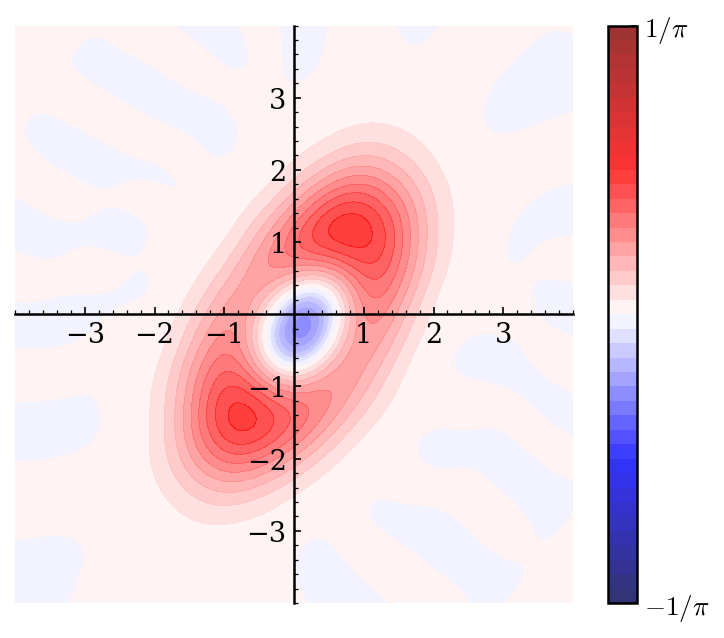

In [172]:
plot_Wigner(rho_est)

In [156]:
np.arange(20, 201, 20)

array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])

In [157]:
np.arange(1, 20, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [162]:
from ipywidgets import interact, FloatSlider

In [177]:
import tkinter as tk
from tkinter import ttk, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

def validate_int(P):
    # P is the value if the edit is allowed
    if P == "" or P.isdigit():
        return True
    return False

def run_code():
    try:
        val1 = int(entry_1.get())
        val2 = int(entry_2.get())
        # Make array from 0 to 165 in steps of 15
        thetas = np.arange(0, 166, 15)
        # Convert to radians
        thetas = np.radians(thetas)
        theta0 = np.deg2rad(57)
        x0 = -0.15

        rho_est, likelihoods = iMLE(thetas-theta0, x_values-x0, N=val1,
                                    num_bins=val2, max_iters=500, tol=1e-3)
        # Clear the previous plot
        ax.clear()

        # Plot Wigner function
        xvec = np.linspace(-4, 4, 200)
        W = rho_to_Wigner(rho_est, xvec, xvec)
        X, Y = np.meshgrid(xvec, xvec)
        vmin, vmax = -1/np.pi, 1/np.pi
        levels = np.linspace(vmin, vmax, 41)  # force levels across full range

        ax.set_title(f"Wigner Function with N = {val1} and n_bins = {val2}")

        # Filled contours with transparency
        contour_filled = ax.contourf(X, Y, W, levels=levels,
                                    cmap='seismic', alpha=0.8, vmin=vmin, vmax=vmax)
        # Colorbar
        cbar = fig.colorbar(contour_filled, ax=ax, ticks=[-1/np.pi, 1/np.pi])
        cbar.ax.set_yticklabels([r"$-1/\pi$", r"$1/\pi$"])  # custom tick labels if needed
        # Move axes to cross at (0,0)
        ax.spines['left'].set_position('zero')
        ax.spines['bottom'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        # Set x- and y-ticks skipping 0
        ax.set_xticks([-3, -2, -1, 1, 2, 3])
        ax.set_yticks([-3, -2, -1, 1, 2, 3])
        PlotSettings(ax, minimalist=True)
        plt.show()
        canvas.draw()

    except ValueError:
        messagebox.showerror("Invalid input", "Please enter valid integers.")

root = tk.Tk()
root.title("Integer Input & Dropdown with Embedded Plot")

# Validation for integer-only Entry
vcmd = (root.register(validate_int), '%P')

tk.Label(root, text="Fock space cutoff:").grid(row=0, column=0, padx=5, pady=5)
entry_1 = tk.Entry(root, validate='key', validatecommand=vcmd)
entry_1.grid(row=0, column=1, padx=5, pady=5)

tk.Label(root, text="Number of bins:").grid(row=1, column=0, padx=5, pady=5)
entry_2 = tk.Entry(root, validate='key', validatecommand=vcmd)
entry_2.grid(row=1, column=1, padx=5, pady=5)

btn = tk.Button(root, text="Run and Plot", command=run_code)
btn.grid(row=2, column=0, columnspan=2, pady=10)

# Matplotlib Figure and embedding
fig, ax = plt.subplots(figsize=(6, 5))

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().grid(row=3, column=0, columnspan=2)

root.mainloop()



 42%|████▏     | 210/500 [00:15<00:20, 13.84it/s]


Converged at iteration 210, log-likelihood=-541835.071356


: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#import ipywidgets as widgets
from ipywidgets import interact, FloatSlider
from tqdm import tqdm
from iMLEv3 import iMLE

N_vals = np.arange(1, 20, 1)
bin_vals = np.arange(20, 201, 20)

rho_matrices = {}

for i, N_val in enumerate(N_vals):
    for j, bin_val in enumerate(bin_vals):
        # Example calculation: a damped sine
        rho_est, likelihoods = iMLE(thetas-theta0, x_values-x0,
                                    N=N_val, num_bins=bin_val)
        rho_matrices[(i, j)] = rho_est

  0%|          | 1/200 [00:00<00:00, 377.53it/s]

Converged at iteration 1, log-likelihood=-813869.822952


  0%|          | 1/200 [00:00<00:01, 134.18it/s]


Converged at iteration 1, log-likelihood=-791097.195706


  0%|          | 1/200 [00:00<00:02, 75.45it/s]


Converged at iteration 1, log-likelihood=-789465.635470


  0%|          | 1/200 [00:00<00:06, 32.12it/s]


Converged at iteration 1, log-likelihood=-788814.359524


  0%|          | 1/200 [00:00<00:06, 32.42it/s]


Converged at iteration 1, log-likelihood=-788606.163844


  0%|          | 1/200 [00:00<00:05, 34.43it/s]


Converged at iteration 1, log-likelihood=-788597.185846


  0%|          | 1/200 [00:00<00:05, 34.55it/s]

Converged at iteration 1, log-likelihood=-788596.081449



  0%|          | 1/200 [00:00<00:06, 31.94it/s]


Converged at iteration 1, log-likelihood=-788520.495082


  0%|          | 1/200 [00:00<00:06, 30.69it/s]

Converged at iteration 1, log-likelihood=-788483.108473



  0%|          | 1/200 [00:00<00:07, 26.80it/s]

Converged at iteration 1, log-likelihood=-788469.672253



 11%|█         | 22/200 [00:00<00:00, 690.85it/s]


Converged at iteration 22, log-likelihood=-630542.541576


  8%|▊         | 15/200 [00:00<00:00, 251.46it/s]

Converged at iteration 15, log-likelihood=-608856.766913



  0%|          | 0/200 [00:00<?, ?it/s]

Converged at iteration 15, log-likelihood=-607230.990655

  8%|▊         | 15/200 [00:00<00:01, 168.66it/s]


  8%|▊         | 15/200 [00:00<00:01, 118.49it/s]


Converged at iteration 15, log-likelihood=-606595.324388


  8%|▊         | 15/200 [00:00<00:01, 98.21it/s] 


Converged at iteration 15, log-likelihood=-606451.776316


  8%|▊         | 16/200 [00:00<00:02, 84.05it/s]

Converged at iteration 16, log-likelihood=-606397.179000



  8%|▊         | 15/200 [00:00<00:03, 61.65it/s]


Converged at iteration 15, log-likelihood=-606350.694509


  8%|▊         | 15/200 [00:00<00:02, 63.47it/s]


Converged at iteration 15, log-likelihood=-606308.173748


  8%|▊         | 16/200 [00:00<00:03, 56.03it/s]


Converged at iteration 16, log-likelihood=-606251.239837


  8%|▊         | 15/200 [00:00<00:03, 47.05it/s]


Converged at iteration 15, log-likelihood=-606257.550283


 88%|████████▊ | 177/200 [00:00<00:00, 298.04it/s]


Converged at iteration 177, log-likelihood=-545595.952385


100%|██████████| 200/200 [00:05<00:00, 36.72it/s]


Output()

In [163]:
# --- Interactive plot ---

xvec = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(xvec, xvec)
vmin, vmax = -1/np.pi, 1/np.pi
levels = np.linspace(vmin, vmax, 41)  # force levels across full range

def plot_function(N_index=0, bin_index=0):
    fig, ax = plt.subplots(figsize=(6, 5))
    # Calculate Wigner function
    rho_est = rho_matrices[(N_index, bin_index)]
    W = rho_to_Wigner(rho_est, xvec, xvec)
    # Filled contours with transparency
    contour_filled = ax.contourf(X, Y, W, levels=levels,
                                cmap='seismic', alpha=0.8, vmin=vmin, vmax=vmax)
    # Colorbar
    cbar = fig.colorbar(contour_filled, ax=ax, ticks=[-1/np.pi, 1/np.pi])
    cbar.ax.set_yticklabels([r"$-1/\pi$", r"$1/\pi$"])  # custom tick labels if needed
    # Move axes to cross at (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # Set x- and y-ticks skipping 0
    ax.set_xticks([-3, -2, -1, 1, 2, 3])
    ax.set_yticks([-3, -2, -1, 1, 2, 3])
    PlotSettings(ax, minimalist=True)
    plt.show()

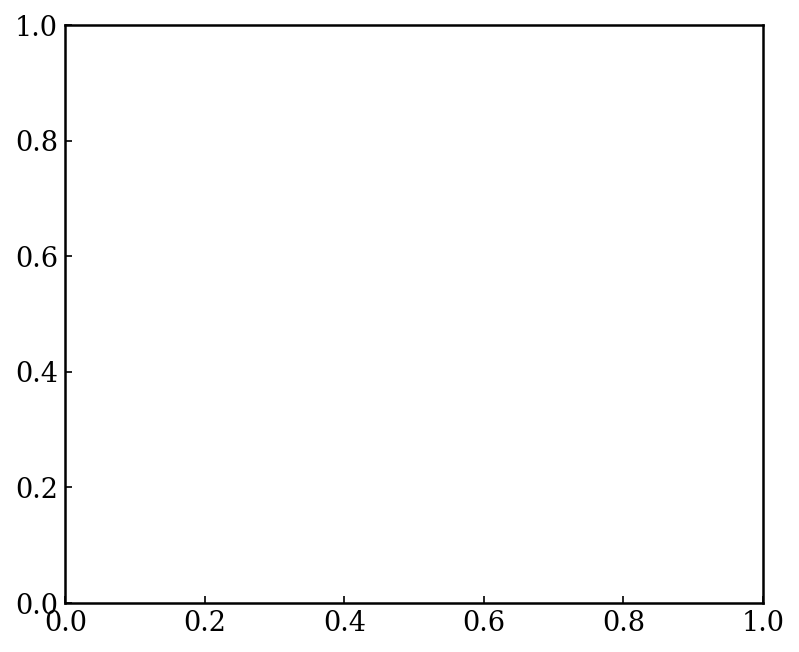

interactive(children=(FloatSlider(value=1.0, description='N', max=20.0, min=1.0, step=1.0), FloatSlider(value=…

<function __main__.plot_function(N_index=0, bin_index=0)>

In [ ]:
# Sliders
interact(
    plot_function,
    N=FloatSlider(min=1, max=20, step=1, value=5, description="N"),
    Bins=FloatSlider(min=20, max=200, step=1, value=50, description="Bins"),
)